In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB

In [34]:
from pycaret.datasets import get_data
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [51]:
df = get_data('glass')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

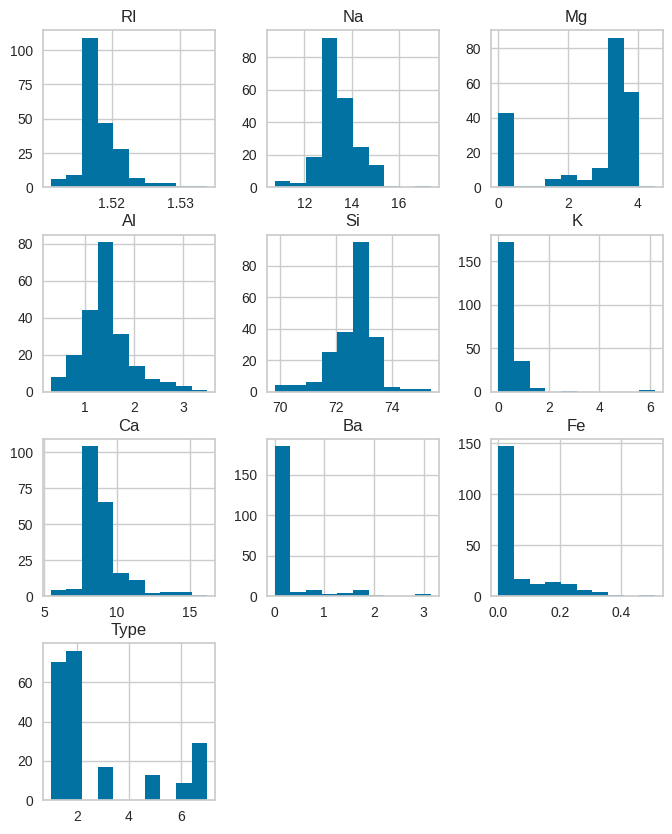

In [21]:
df.hist(figsize = (8, 10))

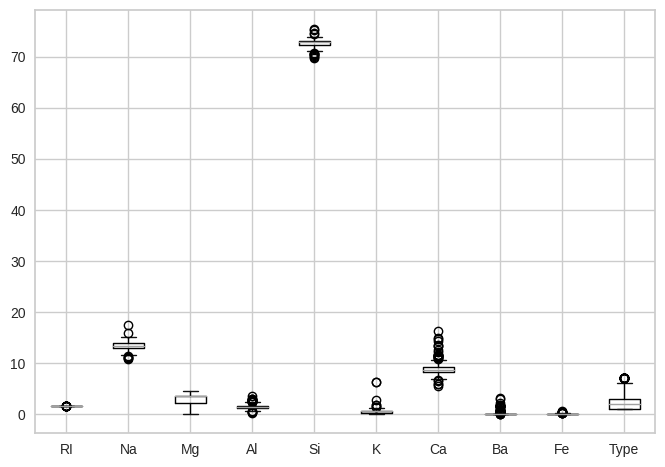

In [22]:
df.boxplot()
plt.show()

<Axes: >

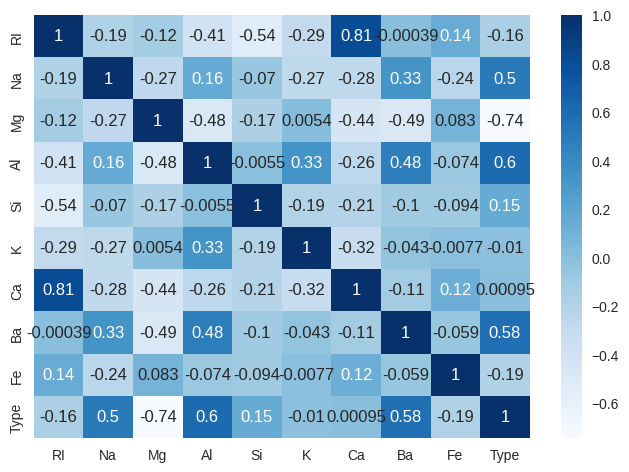

In [23]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

<Axes: >

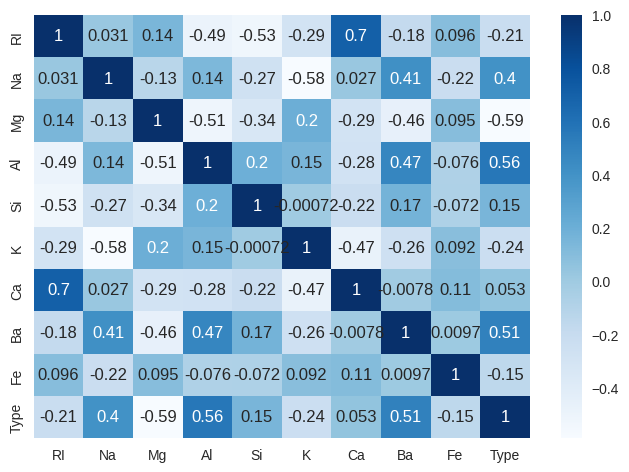

In [24]:
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'Blues')

In [52]:
s = setup(df, target = 'Type', session_id = 1212)

,Description,Value
0,Session id,1212
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [53]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7652,0.0000,0.7652,0.7639,0.7470,0.6743,0.6899,0.1380
rf,Random Forest Classifier,0.7510,0.0000,0.7510,0.7525,0.7321,0.6518,0.6695,0.1740
xgboost,Extreme Gradient Boosting,0.7110,0.0000,0.7110,0.7234,0.6986,0.6058,0.6211,0.0920
gbc,Gradient Boosting Classifier,0.7105,0.0000,0.7105,0.7005,0.6869,0.5938,0.6094,0.7220
lightgbm,Light Gradient Boosting Machine,0.6976,0.0000,0.6976,0.7128,0.6828,0.5807,0.5973,0.8560
knn,K Neighbors Classifier,0.6786,0.0000,0.6786,0.6462,0.6346,0.5418,0.5695,0.0340
lr,Logistic Regression,0.6233,0.0000,0.6233,0.5757,0.5812,0.4613,0.4807,0.2190
lda,Linear Discriminant Analysis,0.6176,0.0000,0.6176,0.6218,0.5955,0.4725,0.4882,0.0260
ridge,Ridge Classifier,0.6171,0.0000,0.6171,0.5482,0.5684,0.4539,0.4690,0.0290
dt,Decision Tree Classifier,0.5905,0.0000,0.5905,0.6422,0.5952,0.4538,0.4660,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

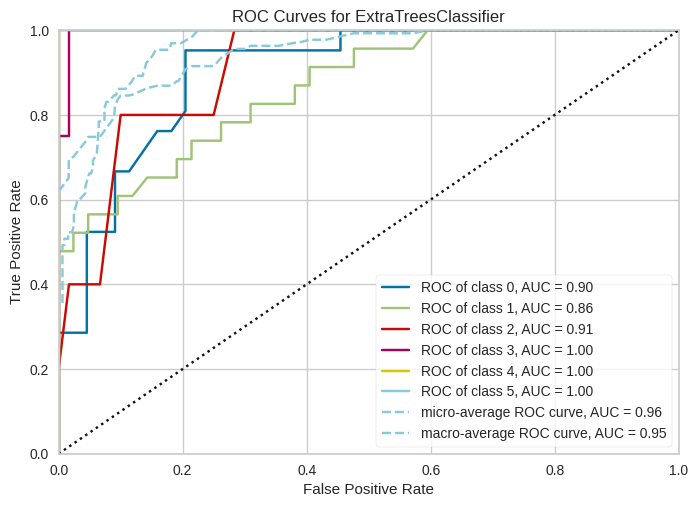

In [54]:
plot_model(best, plot = 'auc')

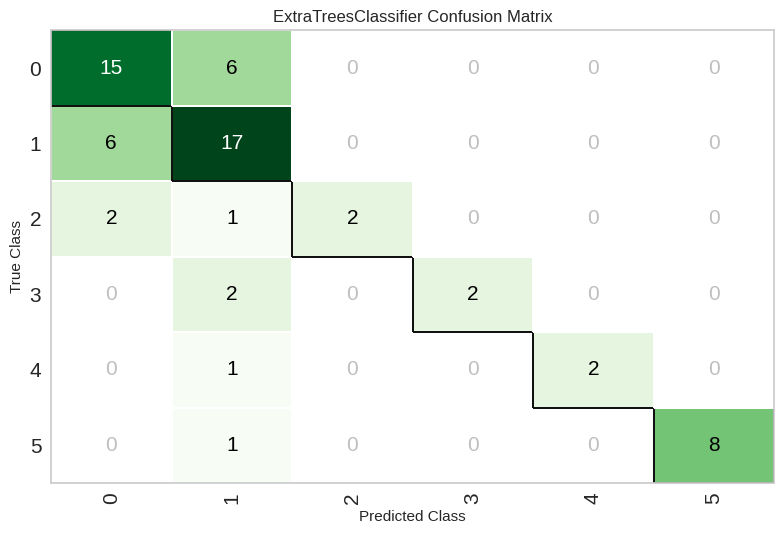

In [55]:
plot_model(best, plot = 'confusion_matrix')

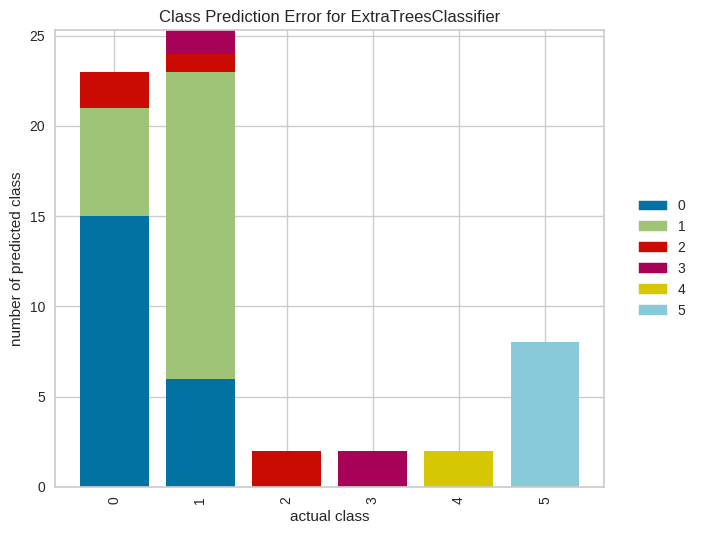

In [56]:
plot_model(best, plot = 'error')

In [57]:
predictions = predict_model(best, data = df)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9112,0.9920,0.9112,0.9154,0.9117,0.8780,0.8787


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
0,1.52101,13.64,4.49,1.10,71.779999,0.06,8.75,0.00,0.0,1,1,1.00
1,1.51761,13.89,3.60,1.36,72.730003,0.48,7.83,0.00,0.0,1,2,0.53
2,1.51618,13.53,3.55,1.54,72.989998,0.39,7.78,0.00,0.0,1,1,1.00
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.00,0.0,1,1,1.00
4,1.51742,13.27,3.62,1.24,73.080002,0.55,8.07,0.00,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.610001,0.08,9.18,1.06,0.0,7,7,0.89
210,1.51685,14.92,0.00,1.99,73.059998,0.00,8.40,1.59,0.0,7,7,1.00
211,1.52065,14.36,0.00,2.02,73.419998,0.00,8.44,1.64,0.0,7,7,1.00
212,1.51651,14.38,0.00,1.94,73.610001,0.00,8.48,1.57,0.0,7,7,1.00
